In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('drive/MyDrive/Exp_consolidated.csv')
data.head()

,Unnamed: 0,EXP No,Speed,Feed,DoC,WoC,Coolant,Dir,Toolwear,Ra,Rz,Mean Spindle Power,Mean MRR
0,0,DOE02_L01,3000,1400,0.5,0.6,1,1,0.0,0.9121,5.0166,167.187627,0.42
1,1,DOE02_L02,4000,2000,0.5,1.0,1,1,0.0,2.1492,10.2291,245.121265,1.00
2,2,DOE02_L03,2000,800,0.5,1.4,1,0,0.0,2.5493,10.7525,93.568688,0.56
3,3,DOE02_L04,1000,200,0.5,0.2,1,0,0.0,0.7172,4.3944,26.367502,0.02
4,4,DOE02_L05,2000,200,1.5,1.0,1,1,0.0,1.9792,9.1521,91.177596,0.30


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain=data[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytrain=data[['Ra']]
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [ ]:
data1=pd.read_csv("drive/MyDrive/Test_consolidated.csv")
xtest=data1[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytest=data1[['Ra']]
xtest=np.array(xtest)
ytest=np.array(ytest)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
regression=LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
reg_pred=regression.predict(xtest)
reg_pred

array([[2.13700317],
       [2.4618129 ],
       [2.93888582],
       [1.30454855],
       [2.46170537],
       [2.34071208],
       [2.01905045],
       [2.51992324],
       [1.56638495],
       [2.32331666],
       [3.65449311],
       [2.71228771],
       [4.43095773],
       [2.09697934],
       [1.88740839],
       [2.58984804]])

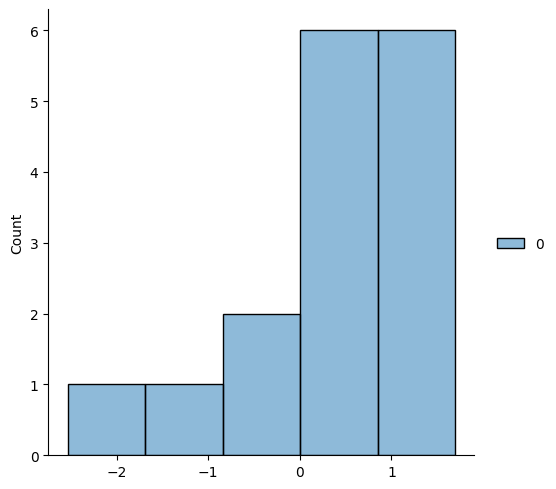

In [ ]:
import seaborn as sns
sns.displot(reg_pred-ytest)

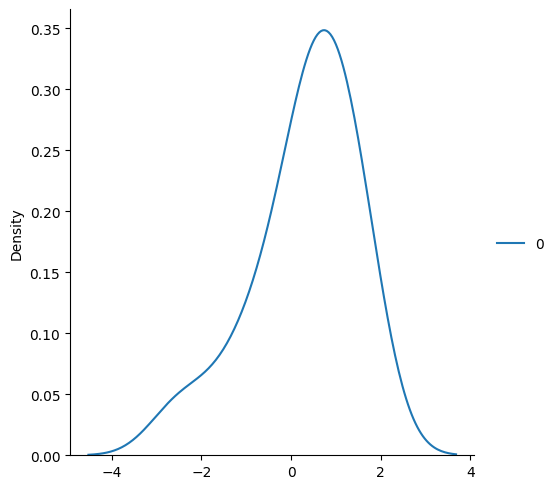

In [ ]:
sns.displot(reg_pred-ytest,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,ytest)
score

-1.5042727872197066

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(reg_pred,ytest)
mae

0.9655320013974997

In [ ]:
mse=mean_squared_error(reg_pred,ytest)
mse

1.3381280996897855

Over fitting in the above general linear regression
So in order to reduce the problem we are suing Lasso and Ridge regression

In [ ]:
data.isna().sum()

Unnamed: 0            0
EXP No                0
Speed                 0
Feed                  0
DoC                   0
WoC                   0
Coolant               0
Dir                   0
Toolwear              0
Ra                    0
Rz                    0
Mean Spindle Power    0
Mean MRR              0
dtype: int64

In [ ]:
from sklearn import linear_model

In [ ]:
lasso_reg=linear_model.Lasso(alpha=4,max_iter=20,tol=0.1)
lasso_reg.fit(xtrain,ytrain)

Lasso(alpha=4, max_iter=20, tol=0.1)

In [ ]:
pred=lasso_reg.predict(xtest)

In [ ]:
mse1=mean_squared_error(pred,ytest)
mse1

1.64207698989483

In [ ]:
lasso_reg.score(xtest,ytest)


-0.4355257581095049

By using the ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=50,tol=0.1)
ridge_reg.fit(xtrain,ytrain)


Ridge(alpha=50, max_iter=50, tol=0.1)

In [ ]:
pred_rid=ridge_reg.predict(xtest)
pred_rid

array([[2.19033056],
       [2.36957399],
       [2.38195731],
       [2.04994851],
       [2.04440517],
       [2.61006807],
       [2.47020615],
       [2.19151755],
       [1.91054084],
       [1.8854122 ],
       [3.183668  ],
       [2.93128462],
       [3.66996703],
       [2.64314866],
       [1.76416487],
       [2.32020495]])

In [ ]:
ridge_reg.score(xtest,ytest)

-0.33291593534719177

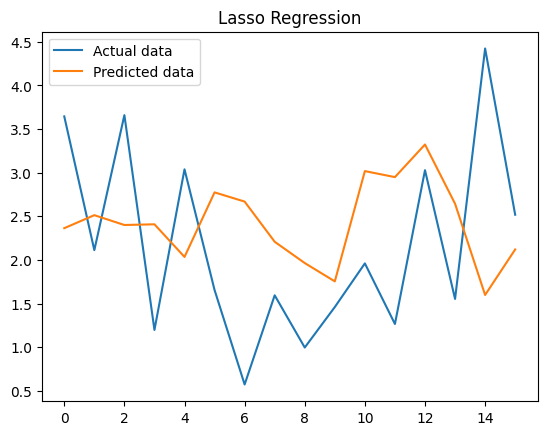

In [ ]:
plt.plot(ytest, label="Actual data")
plt.plot(pred, label="Predicted data")
plt.title("Lasso Regression")
plt.legend()
plt.show()

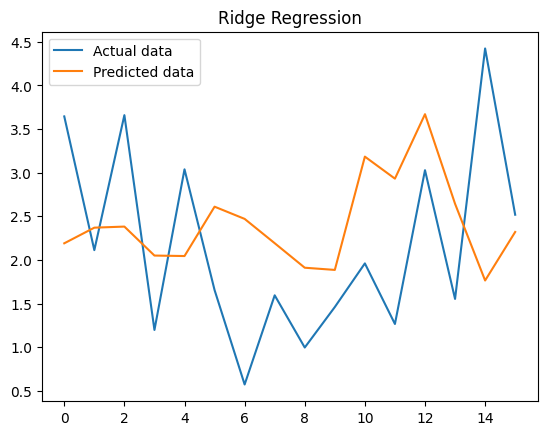

In [ ]:
plt.plot(ytest, label="Actual data")
plt.plot(pred_rid, label="Predicted data")
plt.title("Ridge Regression")
plt.legend()
plt.show()

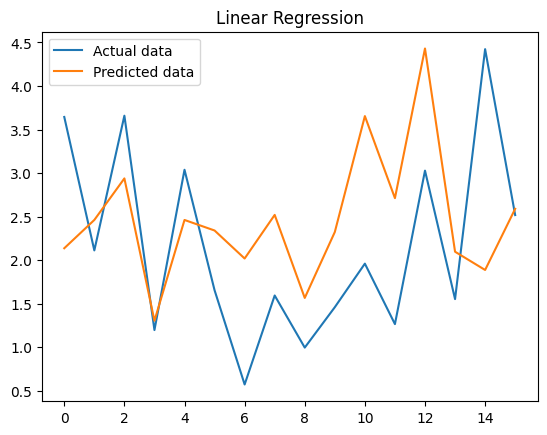

In [ ]:
plt.plot(ytest, label="Actual data")
plt.plot(reg_pred, label="Predicted data")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
pd.DataFrame(reg_pred).to_csv('Ridge Output.csv')
files.download('Ridge Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(pred).to_csv('Lasso Output.csv')
files.download('Lasso Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(pred_rid).to_csv('Linear Regression Output.csv')
files.download('Linear Regression Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
file=open('linear.pkl','wb')
pickle.dump(regression,file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
file=open('lasso.pkl','wb')
pickle.dump(lasso_reg,file)

In [ ]:
import pickle
file=open('ridge.pkl','wb')
pickle.dump(ridge_reg,file)